**Resume Analysis**

Our ideas was to crawl data from LinkedIn and use that data to find top profile matches for a particualr job description.

Challenges we faced:

1. LinkedIn API was very restricted to crawl all the profile data that we are looking for

2. Crawling data from LinkedIn, even with LinkedIn premium has many restrictions. LinkedIn blocks the profile after certain number of views

3. Crawling LinkedIn using a dummy profile was not useful as not all profile is visible to a dummy profile.

So we had to settle for an existing dataset in Kaggle.

In [ ]:
#importing dataset from Github
import pandas as pd
url = "https://raw.githubusercontent.com/sreeram-gsan/resume_dataset/main/ResumeDataSet.csv"
df = pd.read_csv(url)
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


The dataset a category and a dump of the entire resume as another column. Finding the distribution of categories in the input data.

In [ ]:
print (df['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

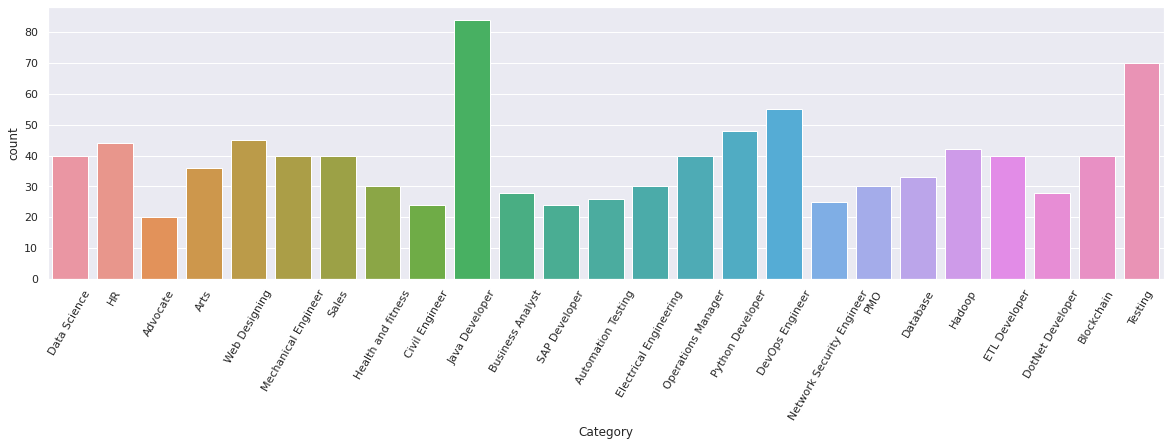

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Category", data=df)
plt.xticks(rotation=60)

**Data Cleaning**

In [ ]:
import re
def cleanText(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text

df['cleaned_text'] = df.Resume.apply(lambda x: cleanText(x))

In [ ]:
df.head()

,Category,Resume,cleaned_text
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanText(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
mostCommonDf = pd.DataFrame(mostcommon)
mostCommonDf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,0,1
0,Exprience,3829
1,months,3233
2,company,3130
3,Details,2967
4,description,2634
5,1,2134
6,Project,1808
7,project,1579
8,6,1499
9,data,1438


In [ ]:
df.head()

,Category,Resume,cleaned_text
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['cleaned_text'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 7351)
(193, 7351)


In [ ]:
#K-Nearest-Neighbours
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy on training set: 0.99
Accuracy on on test set:     0.98


In [ ]:
clf.get_params()

{'estimator': KNeighborsClassifier(),
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'n_jobs': None}

In [ ]:
#SVM
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print('Accuracy on training set: {:.2f}'.format(svclassifier.score(X_train, y_train)))
print('Accuracy on on test set:     {:.2f}'.format(svclassifier.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on on test set:     0.99


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9
                   Hadoop       1.00      1.00      1.00     

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Accuracy on training set: {:.2f}'.format(regressor.score(X_train, y_train)))
print('Accuracy on on test set:     {:.2f}'.format(regressor.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on on test set:     0.99


In [ ]:
print(classification_report(y_test,y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9
                   Hadoop       1.00      1.00      1.00     

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(classification_report(y_train,predict_train))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        16
                     Arts       1.00      1.00      1.00        29
       Automation Testing       1.00      1.00      1.00        21
               Blockchain       1.00      1.00      1.00        32
         Business Analyst       1.00      1.00      1.00        22
           Civil Engineer       1.00      1.00      1.00        19
             Data Science       1.00      1.00      1.00        32
                 Database       1.00      1.00      1.00        26
          DevOps Engineer       1.00      1.00      1.00        44
         DotNet Developer       1.00      1.00      1.00        23
            ETL Developer       1.00      1.00      1.00        32
   Electrical Engineering       1.00      1.00      1.00        24
                       HR       1.00      1.00      1.00        35
                   Hadoop       1.00      1.00      1.00     

In [ ]:
#Demo application to predict the category from a resume.
!pip3 install flask
!mkdir templates
!touch templates/form.html
!pip install flask-ngrok

In [ ]:
!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok


/drive/ngrok-ssh
--2022-04-17 03:23:53--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.237.133.81, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  77.2MB/s    in 0.2s    

2022-04-17 03:23:54 (77.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!/ngrok authtoken 25ywMzqpozklabnajuJNCpGAE1A_VdeHYvBAH1pfgLRubg8e

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
def predict(data):
  cleaned_data = cleanText(data)
  print(cleaned_data)
  WordFeatures = word_vectorizer.transform([cleaned_data])
  print(WordFeatures.shape)
  return clf.predict(WordFeatures)

In [ ]:
data=""
with open('/content/drive/MyDrive/templates/test.txt') as f:
    lines = f.readlines()
    for line in lines:
      clean_line = cleanText(line)
      data = data+clean_line
WordFeatures = word_vectorizer.transform([data])
print(WordFeatures.shape)
clf.predict(WordFeatures)

[' Skills  C C Python Shell Script TACC  MYSQL Redis  HTML CSS Corona Java Script Android  Robot Framework Django EXPERIENCE Arista Networks India Software Developer Oct 2020 present  Working on developing Ecn Wred Protocol on strata platforms for Trident4 chip set Juniper Networks India Software Developer II Jun 2019 Oct 2020  Developed an infrastructure to automate network configuration using Jinja 2 templates and python  Enabled multi queue virtio net support to enhance scalability and performance by allowing parallel packet processing Juniper Networks India Software Developer Jun 2017 Oct 2019  Developed Infrastructure for third party Virtual Network Functions VNF LXC life cycle management with an interactive command line interface for NFX series switches using libvirt KVM qemu environment  Developed Service chain Infrastructure involving SRIOV open vswitch Intel Dpdk for VNF communication  Implement port mirroring feature for health monitoring on NFX series switches Juniper Networ

In [ ]:
from flask import Flask, request,render_template
from flask_ngrok import run_with_ngrok
app = Flask(__name__, template_folder='/content/drive/MyDrive/templates')
run_with_ngrok(app)

@app.route('/', methods =["GET", "POST"])
def form_action():
    if request.method == "POST":
        resume = request.form.get("resume")
        label = predict(resume)
        label_str = "<h1>{}</h1>".format(label)
        return label_str
    return render_template("form.html")

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://dc5d-34-85-238-135.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [17/Apr/2022 03:36:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Apr/2022 03:37:00] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Apr/2022 03:37:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Apr/2022 03:37:02] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [17/Apr/2022 03:37:05] "POST / HTTP/1.1" 200 -


Education Master s In Computer Science University of Colorado Boulder GPA 4 4 sachin sachinsharma6174 Boulder CO May 2023 Expected Boulder CO May 2017 Bangalore India Sachin Sharma Bachelor s in Computer Science and Engineering M S Ramaiah Institute of Technology CGPA 8 96 10 0 Technical Skills Languages Python JAVA C C JavaScript SQL LaTeX Shell Databases MySQL PostgreSQL Elastic Search Redis Frameworks and Libraries SpringBoot REST Hibernate Flask Kafka RabbitMQ Mocktio Gradle Cloud GoogleCloud AutoML Cloud Functions AWS Lambda Heroku Tools and Software Linux Git Docker JIRA Kibana Jenkins Kubernetes NFS Knowledge Data Structures Algorithms Computer Networks Virtual Machines Distributed Systems ML AI Experience Software Engineer III Walmart Digital Pharmacy Jan 2021 Aug 2021 India Created microservice for various prescription Rx refill task with HIPAA compliance with over 85 test coverage Worked on integration of Cloud Configuration Management for microservices to support static and 

127.0.0.1 - - [17/Apr/2022 03:37:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Apr/2022 03:38:00] "POST / HTTP/1.1" 200 -


Sachin Sharma Bachelor s in Computer Science and Engineering M S Ramaiah Institute of Technology CGPA 8 96 10 0 Technical Skills Languages Python JAVA C C JavaScript SQL LaTeX Shell Databases MySQL PostgreSQL Elastic Search Redis Frameworks and Libraries SpringBoot REST Hibernate Flask Kafka RabbitMQ Mocktio Gradle Cloud GoogleCloud AutoML Cloud Functions AWS Lambda Heroku Tools and Software Linux Git Docker JIRA Kibana Jenkins Kubernetes NFS Knowledge Data Structures Algorithms Computer Networks Virtual Machines Distributed Systems ML AI Experience Software Engineer III Walmart Digital Pharmacy Jan 2021 Aug 2021 India Created microservice for various prescription Rx refill task with HIPAA compliance with over 85 test coverage Worked on integration of Cloud Configuration Management for microservices to support static and dynamic configuration and rule loading without restarting the application Software Engineer Paytm Money Oct 2018 Jan 2021 India Architected and developed Instant Redem